### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

### Importing Data

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df= dataset['train'].to_pandas()

### Converting Datatype

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))
df_US = df[df['job_country']=="United States"].copy()

### Flattening Job Skill List

In [4]:
df_US_exploded = df_US.explode('job_skills')

### Grouping Skills and Job Title

In [5]:
df_US_grouped = df_US_exploded.groupby(['job_title_short','job_skills']).size()
df_US_skill_count = df_US_grouped.reset_index(name='skill_count') #to change the table to dataframe
df_US_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_US_skill_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


### Extracting top 3 Job Title into List

In [6]:
job_titles = df_US_skill_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]
job_titles = sorted(job_titles)
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plotting horizontal bar chart for each job title for top 5 Skills

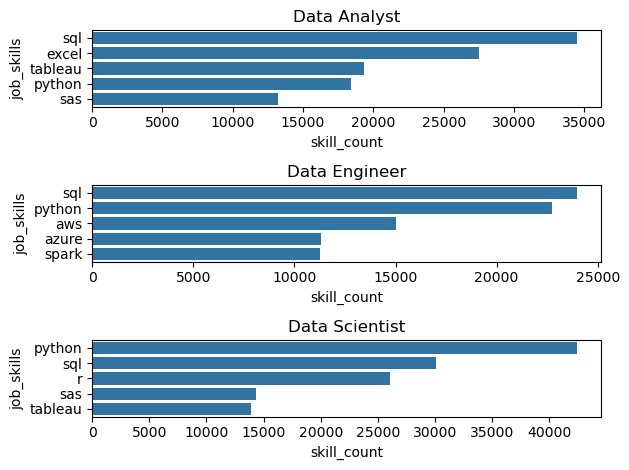

In [7]:
fig,ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_US_skill_count[df_US_skill_count['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_count',y='job_skills',ax=ax[i],)
    ax[i].set_title(job_title)

plt.tight_layout()

### Converting skill_count into percent

In [8]:
df_job_posted_count = df_US['job_title_short'].value_counts()
df_job_posted_count = df_job_posted_count.reset_index(name='job_count') #to change the table to dataframe
df_job_posted_count

,job_title_short,job_count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [9]:
df_US_perc = pd.merge(df_US_skill_count,df_job_posted_count,how='left',on='job_title_short')
df_US_perc['skill_perc'] = 100 * (df_US_perc['skill_count']/df_US_perc['job_count'])
df_US_perc

,job_title_short,job_skills,skill_count,job_count,skill_perc
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


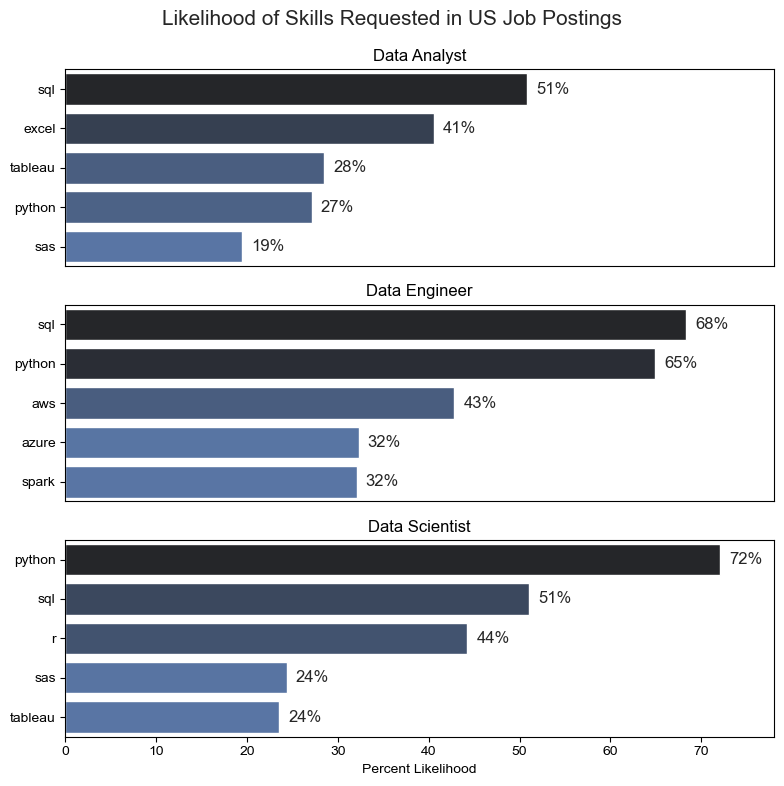

In [10]:
fig,ax = plt.subplots(len(job_titles),1,figsize=(8,8))

sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_perc_plot = df_US_perc[df_US_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_perc_plot,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_perc',palette='dark:b_r',legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,78)
    
    for n , v in enumerate(df_perc_plot['skill_perc']):
        ax[i].text(v + 1, n , f'{v:.0f}%', va = 'center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])
ax[2].set_xlabel("Percent Likelihood")
ax[0].set_xlabel("")
ax[1].set_xlabel("")

fig.suptitle("Likelihood of Skills Requested in US Job Postings",fontsize = 15)
fig.tight_layout()
plt.show()


